- In this notebook we explore the eco-friendliness of products in terms of labels ! We will see there are many different labels and we will try to wrangle our way around those labels and see if we can reach any interesting conclusions

In [1]:
import pandas as pd
import numpy as np
import scipy as scp
import matplotlib.pyplot as plt

In [2]:
DATAPATH = 'data/'

In [3]:
data = pd.read_csv(DATAPATH+'labels.csv',delimiter=',',low_memory=False)
data.set_index('code',inplace=True)
data.shape

(99655, 3)

In [4]:
data_total = pd.read_csv(DATAPATH+'cleaned_unique_index.csv',delimiter=',',low_memory=False)
data_total.set_index('code',inplace=True)

In [5]:
data.head()

,labels,labels_tags,labels_en
code,,,
0000000020114,Fabriqué en France,en:made-in-france,Made in France
0000000274722,"Viande Française,Fabriqué en France","fr:viande-francaise,en:made-in-france","fr:Viande Française,Made in France"
0000003444009,Contient des OGM,en:contains-gmos,Contains GMOs
0000005200016,AB,"en:organic,en:eu-organic,fr:ab-agriculture-bio...","Organic,EU Organic,fr:AB Agriculture Biologique"
0000007020254,"Kascher,Contient des OGM","en:kosher,en:contains-gmos","Kosher,Contains GMOs"


In [6]:
# We do a 'flatmap' trick...
label_flatted = data["labels_en"].str.split(',').apply(pd.Series).unstack().dropna().to_frame()
label_flatted.columns = ["labels"]
label_flatted = label_flatted.reset_index().set_index("code")
label_flatted = label_flatted[["labels"]]
label_flatted.head()

,labels
code,
0000000020114,Made in France
0000000274722,fr:Viande Française
0000003444009,Contains GMOs
0000005200016,Organic
0000007020254,Kosher


In [7]:
organic = label_flatted[label_flatted["labels"].str.contains("Organic")]
organic = organic[~organic.index.duplicated()] ## We don't want to many. 


In [8]:
cnt_organic = organic.shape[0]
total_cnt = data_total.shape[0]
percentage = cnt_organic / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage)

There are 37395 articles with label organic
This represents 0.056175 % of articles 


In [9]:
bio = label_flatted[label_flatted["labels"].str.contains("Bio")]
bio = bio[~bio.index.duplicated()] ## We don't want to many. 
bio

,labels
code,
0018627740001,Bio
0221109418736,it:Bio
02516101,fr:Biogroupe
0621456277183,fr:Biologique-avec-legumes
11044204,fr:Bio7
11304915,Bio
13294803,Bio
15667496,fr:Bio-organic
2000000020926,Bio


In [10]:
cnt_organic = organic.shape[0]
cnt_bio = bio.shape[0]
total_cnt = data_total.shape[0]
percentage_organic = cnt_organic / total_cnt
percentage_bio = cnt_bio / total_cnt
print("There are %d articles with label organic" % cnt_organic)
print("This represents %f %% of articles " % percentage_organic)
print("There are %d articles with label bio" % cnt_bio)
print("This represents %f %% of articles " % percentage_bio)

There are 37395 articles with label organic
This represents 0.056175 % of articles 
There are 13886 articles with label bio
This represents 0.020859 % of articles 


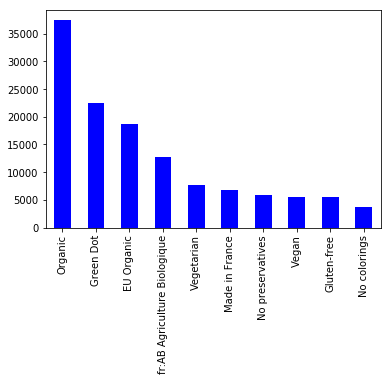

In [12]:
label_flatted["labels"].value_counts().nlargest(10).plot.bar(color='b')
plt.savefig("img/labels/count_by_label.png")
plt.show()

- We can see that the most popular label is organic, there are also a lot of articles having the green dot label which is depicted below for people who do not know what it is. 
- In order here are the most popular labels, unfortunately having an organic label is not a real label. It is a wide concept. Agriculture biologique is a french label. 
<img src="img/eu_organic.jpg" alt="EU Organic">
<img src="img/green_dot.svg" alt="Green Dot">
<img src="img/agri_bio.png" alt="Agriculture biologique">


- We now focus on those three mentionned label to see where we can find them most. 


In [13]:
top_4 = label_flatted["labels"].value_counts().nlargest(4)
top_4 = list(top_4.index)
top_4_articles = label_flatted[label_flatted["labels"].apply(lambda r : r in top_4)]

In [14]:
top_4_all = top_4_articles.join(data_total["origins"], how="inner",lsuffix="l",rsuffix="r").dropna(subset=["origins"])
top_4_all.head()

,labels,origins
code,,
00028202,Green Dot,Royaume-Uni
00035460,Green Dot,Vietnam
00042611,Organic,?
00042611,EU Organic,?
00042611,fr:AB Agriculture Biologique,?


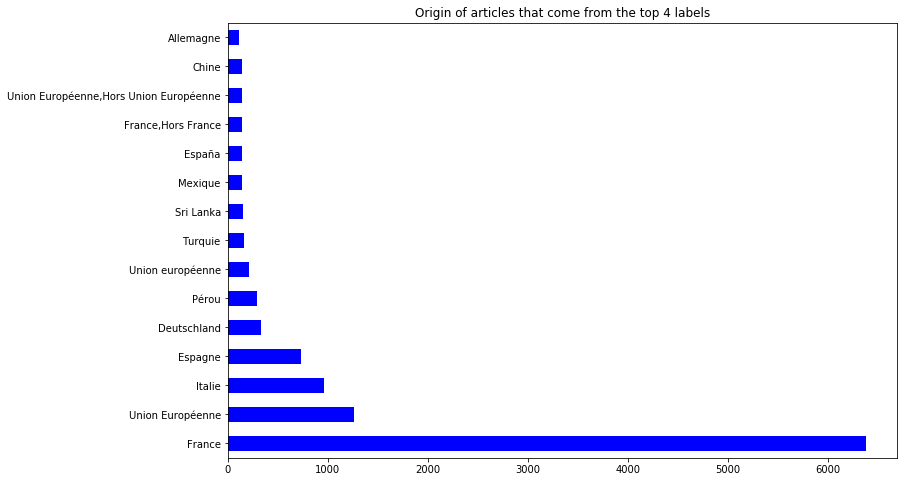

In [22]:

top_4_all[np.logical_not(np.logical_or(top_4_all["origins"].str.contains("EU"),top_4_all["origins"].str.contains("UE")))]["origins"].value_counts().nlargest(15).plot.barh(figsize=(12,8),title="Origin of articles that come from the top 4 labels",color='b')
plt.savefig("img/labels/origin_top_4_labels")
plt.show()

In [34]:
df = pd.read_csv(DATAPATH+"/Origine-Coordinate-raw-MAN.csv")
df.head()

,Unnamed: 0,origins_tags,origine,Coord,Point,Coord_x,Coord_y
0,france,11051,france,"France métropolitaine, France","(46.603354, 1.8883335, 0.0)",46.603354,1.888333
1,union-europeenne,1986,union-europeenne,"European Union, Άμπελος, Δήμος Γαύδου, Περιφερ...","(34.8696391, 24.068801347645, 0.0)",34.869639,24.068801
2,italie,969,italie,Italia,"(42.6384261, 12.674297, 0.0)",42.638426,12.674297
3,espagne,889,espagne,España,"(39.3262345, -4.8380649, 0.0)",39.326234,-4.838065
4,mexico,814,mexico,"Ciudad de México, Cuauhtémoc, 06060, México","(19.4326009, -99.1333416, 0.0)",19.432601,-99.133342


- We can see that most products come from France however there are a number of articles that come way further than france, it will be interesting to see to study where they are being sold, but this will be done in depth in an other study. 

code
0000000274722                                            france
0000000290616                                            quebec
0000000394710                                            quebec
0000001071894                                            france
0000001938067                                            quebec
0000004302544                                            quebec
0000008237798                                            quebec
0000008240095                                            quebec
0000012167005                                     quebec,canada
0000020004552                                            france
0000034152010                                            france
00000758                                         united-kingdom
00001373                                                germany
0000204286484                                           germany
0000204286644                                           germany
0000250632969                      